In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import glob
import os
from shutil import copyfile
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.concat([pd.read_csv(f, sep='\s+', header=1) for f in glob.glob('*/score.sc')], ignore_index = True)

(-132.44133125, 15.706976456784135)


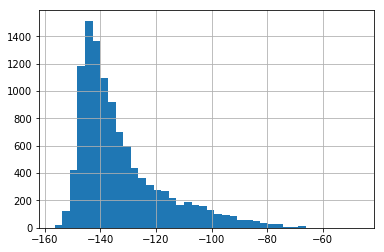

In [3]:
df['hbond_lr_bb'].hist(bins=40)
print(df['hbond_lr_bb'].mean(), df['hbond_lr_bb'].std())

(104.51912982142859, 194.41885347386244)


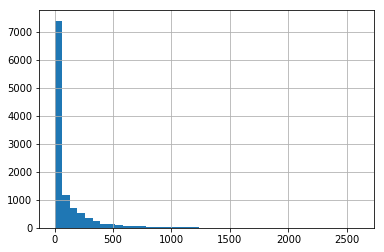

In [4]:
df['vdw'].hist(bins=40)
print(df['vdw'].mean(), df['vdw'].std())

(49.48184116071429, 35.442990544843866)


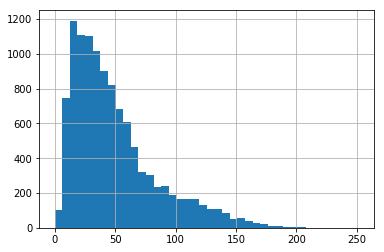

In [5]:
df['omega'].hist(bins=40)
print(df['omega'].mean(), df['omega'].std())

(10.570323392857143, 9.329882906781906)


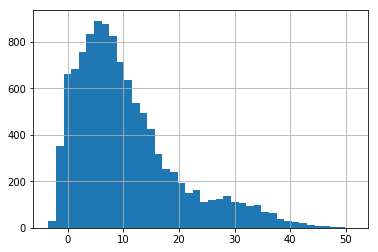

In [6]:
df['cen_rama'].hist(bins=40)
print(df['cen_rama'].mean(), df['cen_rama'].std())

In [17]:
dclash = df.loc[(df['vdw'] < 1.0) & (df['omega'] < 16.0) & (df['cen_rama'] < 2)]
dclash

,SCORE:,total_score,angle_constraint,atom_pair_constraint,cen_rama,cen_total,coordinate_constraint,dihedral_constraint,hbond_lr_bb,hbond_sr_bb,omega,rama,rg,rsigma,ss_pair,sspair,vdw,description
2,SCORE:,8618.639,9415.111,6.769,0.145,-777.497,0.0,0.100,-145.266,-36.664,7.999,0.145,17.265,-249.505,-397.125,-397.125,0.849,input_0003
32,SCORE:,8629.959,9414.673,7.050,1.373,-763.946,0.0,0.144,-146.189,-39.275,12.910,1.373,17.234,-252.006,-385.784,-385.784,0.709,input_0033
84,SCORE:,8622.730,9401.977,6.166,-0.831,-757.213,0.0,0.086,-146.121,-36.746,10.667,-0.831,17.282,-244.814,-384.755,-384.755,0.695,input_0085
89,SCORE:,8593.885,9402.743,4.934,-1.732,-792.172,0.0,0.179,-150.988,-40.087,4.784,-1.732,17.247,-255.889,-387.132,-387.132,0.212,input_0090
94,SCORE:,8592.267,9386.048,6.154,-0.136,-774.657,0.0,0.080,-148.317,-37.190,6.328,-0.136,17.244,-248.581,-389.187,-389.187,0.517,input_0095
109,SCORE:,8633.708,9410.698,10.045,1.556,-756.623,0.0,0.545,-142.448,-39.035,11.210,1.556,17.399,-248.469,-388.956,-388.956,0.694,input_0010
137,SCORE:,8606.772,9372.147,6.535,-0.048,-740.093,0.0,0.013,-142.545,-39.035,14.590,-0.048,17.052,-239.547,-382.205,-382.205,0.637,input_0038
161,SCORE:,8606.278,9385.552,7.088,-0.326,-763.086,0.0,0.315,-147.430,-39.091,10.211,-0.326,17.347,-248.479,-378.736,-378.736,0.335,input_0062
166,SCORE:,8592.035,9361.269,9.643,0.240,-742.787,0.0,0.196,-147.979,-33.714,15.515,0.240,17.070,-242.136,-388.510,-388.510,0.879,input_0067
174,SCORE:,8659.127,9396.672,6.471,1.910,-710.151,0.0,0.100,-149.210,-40.356,15.794,1.910,16.916,-235.200,-354.097,-354.097,0.959,input_0075


In [3]:
for folder_id in range(0,111):
    score_file = str(folder_id) +"/"+ "score.sc"
    dsc = pd.read_csv(score_file, sep='\s+', header=1)
    dclashes = dsc.loc[(dsc['vdw'] < 1.0) & (dsc['omega'] < 16.0) & (dsc['cen_rama'] < 2)]
    print dclashes.shape
    for model in dclashes.description:
        source = str(folder_id) + "/" + model + ".pdb"
        target = "best_500/" + str(folder_id)+"_"+ model + ".pdb"
        copyfile(source, target)


(6, 18)
(7, 18)
(7, 18)
(6, 18)
(3, 18)
(4, 18)
(6, 18)
(4, 18)
(2, 18)
(1, 18)
(4, 18)
(4, 18)
(4, 18)
(3, 18)
(4, 18)
(4, 18)
(3, 18)
(4, 18)
(6, 18)
(6, 18)
(4, 18)
(5, 18)
(4, 18)
(8, 18)
(3, 18)
(6, 18)
(4, 18)
(1, 18)
(3, 18)
(2, 18)
(4, 18)
(5, 18)
(3, 18)
(5, 18)
(6, 18)
(6, 18)
(2, 18)
(5, 18)
(4, 18)
(7, 18)
(3, 18)
(5, 18)
(5, 18)
(4, 18)
(6, 18)
(2, 18)
(5, 18)
(2, 18)
(1, 18)
(2, 18)
(2, 18)
(2, 18)
(5, 18)
(4, 18)
(1, 18)
(3, 18)
(3, 18)
(5, 18)
(6, 18)
(5, 18)
(8, 18)
(1, 18)
(6, 18)
(8, 18)
(4, 18)
(6, 18)
(7, 18)
(6, 18)
(3, 18)
(5, 18)
(6, 18)
(5, 18)
(6, 18)
(2, 18)
(5, 18)
(2, 18)
(3, 18)
(1, 18)
(4, 18)
(4, 18)
(6, 18)
(7, 18)
(8, 18)
(2, 18)
(8, 18)
(10, 18)
(6, 18)
(8, 18)
(7, 18)
(8, 18)
(9, 18)
(5, 18)
(4, 18)
(13, 18)
(2, 18)
(3, 18)
(6, 18)
(7, 18)
(6, 18)
(8, 18)
(7, 18)
(4, 18)
(1, 18)
(2, 18)
(3, 18)
(0, 18)
(2, 18)
(1, 18)
(2, 18)
(8, 18)
(2, 18)


In [2]:
df = pd.concat([pd.read_csv(f, sep='\s+', header=1) for f in glob.glob('best_500/*_input_*/score.sc')], ignore_index = True)
print(df)

      SCORE:  total_score  aa_composition  angle_constraint  \
0     SCORE:       73.011             0.0               0.0   
1     SCORE:       25.891             0.0               0.0   
2     SCORE:       58.404             0.0               0.0   
3     SCORE:       54.610             0.0               0.0   
4     SCORE:       55.794             0.0               0.0   
5     SCORE:     -609.452             0.0               0.0   
6     SCORE:     -599.887             0.0               0.0   
7     SCORE:     -600.439             0.0               0.0   
8     SCORE:     -599.773             0.0               0.0   
9     SCORE:     -600.582             0.0               0.0   
10    SCORE:     -597.313             0.0               0.0   
11    SCORE:     -606.742             0.0               0.0   
12    SCORE:     -592.719             0.0               0.0   
13    SCORE:     -616.298             0.0               0.0   
14    SCORE:     -604.817             0.0              

(17.30939125248509, 2.9564800369414903)


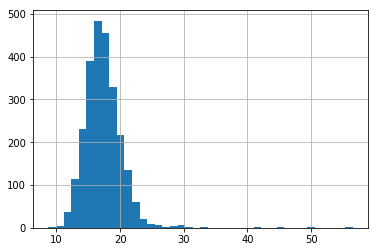

In [3]:
df['omega'].hist(bins=40)
print(df['omega'].mean(), df['omega'].std())

(4.8046568588469185, 10.27360760294763)


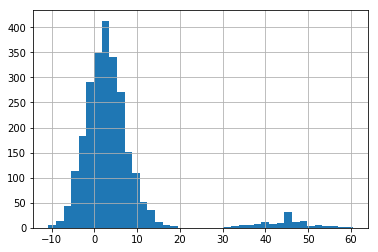

In [4]:
df['rama_prepro'].hist(bins=40)
print(df['rama_prepro'].mean(), df['rama_prepro'].std())

(-134.57326401590458, 2.682578061782186)


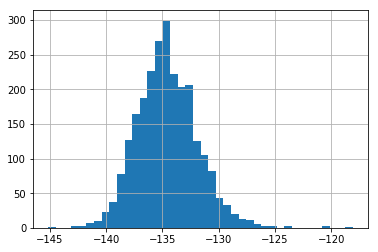

In [5]:
df['hbond_lr_bb'].hist(bins=40)
print(df['hbond_lr_bb'].mean(), df['hbond_lr_bb'].std())

(-568.2282246520874, 143.83620856001065)


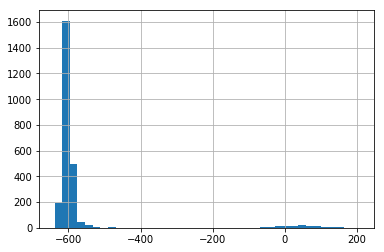

In [6]:
df['total_score'].hist(bins=40)
print(df['total_score'].mean(), df['total_score'].std())

In [10]:
best_round1 = df.loc[(df['total_score'] < -550) & (df['omega'] < 17.3) & (df['rama_prepro'] < 1) & (df['hbond_lr_bb'] < -130)]
best_round1.shape

(519, 26)

In [11]:
#best_round1 = df.loc[(df['total_score'] < -550) & (df['omega'] < 16.0) & (df['rama_prepro'] < -1) & (df['hbond_lr_bb'] < -131)]
#best_round1.shape
for model in best_round1.description:
    folder_id = "_".join(model.split("_")[0:3])
    source = "best_500/" + str(folder_id) + "/" + model + ".pdb"
    target = "round1/" + model + ".pdb"
    copyfile(source, target)

In [2]:
df = pd.concat([pd.read_csv(f, sep='\s+', header=1) for f in glob.glob('best_200_AAAGG/*__input_*/score.sc')], ignore_index = True)
print df

     SCORE:  total_score  dslf_fa13   fa_atr   fa_dun  fa_elec  fa_intra_rep  \
0    SCORE:     -398.651        0.0 -597.811   97.587 -246.670         1.262   
1    SCORE:     -388.285        0.0 -592.514  104.944 -245.595         1.373   
2    SCORE:     -392.825        0.0 -582.011   94.813 -261.821         1.168   
3    SCORE:     -401.955        0.0 -582.534   91.896 -245.974         1.156   
4    SCORE:     -399.010        0.0 -599.945  103.746 -255.615         1.337   
5    SCORE:     -413.838        0.0 -600.581   94.060 -247.970         1.260   
6    SCORE:     -412.315        0.0 -607.139  104.933 -251.784         1.302   
7    SCORE:     -427.854        0.0 -615.161   99.664 -256.290         1.365   
8    SCORE:     -403.723        0.0 -598.187   97.434 -257.173         1.240   
9    SCORE:     -407.535        0.0 -605.922  102.364 -255.479         1.308   
10   SCORE:     -390.281        0.0 -590.385   89.749 -256.400         1.257   
11   SCORE:     -396.337        0.0 -567

(14.397738064516128, 4.34814222229521)


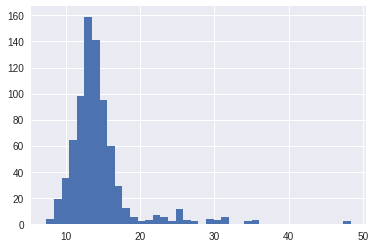

In [3]:
df['omega'].hist(bins=40)
print(df['omega'].mean(), df['omega'].std())

(-4.0910916129032255, 5.4469146066288125)


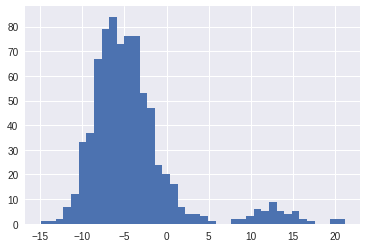

In [4]:
df['rama_prepro'].hist(bins=40)
print(df['rama_prepro'].mean(), df['rama_prepro'].std())

(-86.591006451612898, 2.6741875713242305)


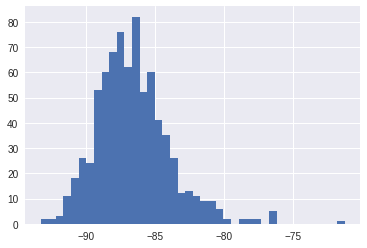

In [5]:
df['hbond_lr_bb'].hist(bins=40)
print(df['hbond_lr_bb'].mean(), df['hbond_lr_bb'].std())

(-335.55036903225806, 216.05220453853102)


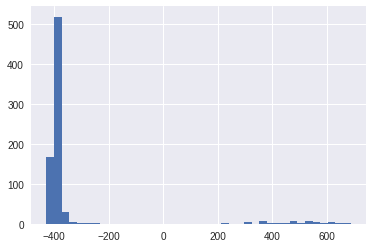

In [6]:
df['total_score'].hist(bins=40)
print(df['total_score'].mean(), df['total_score'].std())

In [11]:
best_round1 = df.loc[(df['total_score'] < -370) & (df['omega'] < 13.5) & (df['rama_prepro'] < -3.6) & (df['hbond_lr_bb'] < -85)]
best_round1.shape

for model in best_round1.description:
    model_id = model.split("_")[:-1]
    folder_id = "network_filter/" + "_".join(model.split("_")[0:4])
    source = "best_200_AAAGG/" + str(folder_id) + "/" + model + ".pdb"
    target = "round1_AAAGG/" + model + ".pdb"
    copyfile(source, target)